In [1]:
import os
import cv2
import numpy as np
from network import *
from keras.models import load_model
from matplotlib import pyplot as plt

# Load image

In [2]:
img_load = os.path.join('cat_and_dog_det_data', 'images', 'Cats_Test0.png')
print(img_load)

cat_and_dog_det_data/images/Cats_Test0.png


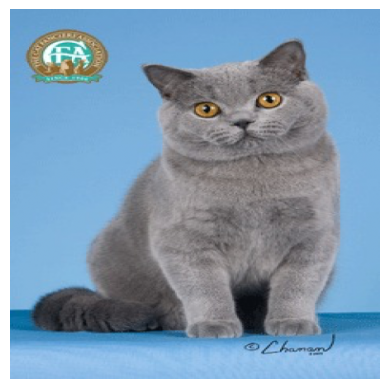

In [3]:
img = cv2.cvtColor(cv2.imread(img_load), cv2.COLOR_BGR2RGB)
img = cv2.resize(img, (448, 448), interpolation=cv2.INTER_AREA)
img = img/255.
img = np.expand_dims(img, 0)
plt.axis('off')
plt.imshow(img[0])
plt.show()

# Define detection model

In [4]:
det_model =  Det_Network(cls_num = 2, is_train = False).obj_det()

Metal device set to: Apple M1


2023-05-02 04:19:58.687231: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-05-02 04:19:58.687929: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)



systemMemory: 8.00 GB
maxCacheSize: 2.67 GB



In [5]:
print(det_model.summary())

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 448, 448, 3)]     0         
                                                                 
 backbone (Sequential)       (None, 28, 28, 256)       1153728   
                                                                 
 neck (Sequential)           (None, 7, 7, 1024)        5901312   
                                                                 
 det_flatten (Flatten)       (None, 50176)             0         
                                                                 
 det_dense1 (Dense)          (None, 640)               32113280  
                                                                 
 det_dropout2 (Dropout)      (None, 640)               0         
                                                                 
 det_LReLU (LeakyReLU)       (None, 640)               0     

# Try to run the detection model

In [6]:
res = det_model.predict(img)

2023-05-02 04:19:59.401263: W tensorflow/core/platform/profile_utils/cpu_utils.cc:128] Failed to get CPU frequency: 0 Hz


1/1 [==============================] - 1s 727ms/step


2023-05-02 04:19:59.856643: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:113] Plugin optimizer for device_type GPU is enabled.


In [7]:
#reshape 
res = res.reshape((-1, 7, 7, 2*5 + 2))
print(res.shape)

(1, 7, 7, 12)
